In [6]:
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# from func1 import *
# from query2 import *
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('Data_Historian01.csv')  

In [8]:
df

,datetime,MW,80GAW,26WIS,26WOS,dTemp,k,Q
0,2020-02-13 15:00:00,70.10,4854.22,29.05,26.30,2.75,249.86,926.20
1,2020-02-13 16:00:00,70.04,4868.03,29.24,26.36,2.88,249.86,974.52
2,2020-02-13 17:00:00,41.11,3103.07,26.77,29.08,2.32,249.86,498.87
3,2020-02-13 18:00:00,48.83,2978.46,26.83,29.31,2.48,249.86,512.39
4,2020-02-13 19:00:00,93.21,4890.02,29.93,27.21,2.72,249.86,923.95
...,...,...,...,...,...,...,...,...
3295,2020-06-29 22:00:00,0.00,0.00,0.00,0.00,0.00,249.86,0.00
3296,2020-06-29 23:00:00,0.00,0.00,0.00,0.00,0.00,249.86,0.00
3297,2020-06-30 00:00:00,0.00,0.00,0.00,0.00,0.00,249.86,0.00
3298,2020-06-30 01:00:00,0.00,0.00,0.00,0.00,0.00,249.86,0.00


In [9]:
print(df.shape)

(3300, 8)


In [10]:
df.index = df['datetime']

In [11]:
df.index = df.index.astype('datetime64[ns]')

In [12]:
df.sort_index(inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(3300, 8)

In [15]:
df

,datetime,MW,80GAW,26WIS,26WOS,dTemp,k,Q
datetime,,,,,,,,
2020-02-13 15:00:00,2020-02-13 15:00:00,70.10,4854.22,29.05,26.30,2.75,249.86,926.20
2020-02-13 16:00:00,2020-02-13 16:00:00,70.04,4868.03,29.24,26.36,2.88,249.86,974.52
2020-02-13 17:00:00,2020-02-13 17:00:00,41.11,3103.07,26.77,29.08,2.32,249.86,498.87
2020-02-13 18:00:00,2020-02-13 18:00:00,48.83,2978.46,26.83,29.31,2.48,249.86,512.39
2020-02-13 19:00:00,2020-02-13 19:00:00,93.21,4890.02,29.93,27.21,2.72,249.86,923.95
...,...,...,...,...,...,...,...,...
2020-06-29 22:00:00,2020-06-29 22:00:00,0.00,0.00,0.00,0.00,0.00,249.86,0.00
2020-06-29 23:00:00,2020-06-29 23:00:00,0.00,0.00,0.00,0.00,0.00,249.86,0.00
2020-06-30 00:00:00,2020-06-30 00:00:00,0.00,0.00,0.00,0.00,0.00,249.86,0.00


In [29]:
df.drop(('datetime'), axis=1, inplace=True)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
y_scaler = MinMaxScaler()
y_scaler.fit(df[['Q']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
X_scaler = MinMaxScaler()

In [33]:
df[['MW','80GAW','26WIS','26WOS','dTemp','k','Q']] = X_scaler.fit_transform(df)

In [34]:
df

,MW,80GAW,26WIS,26WOS,dTemp,k,Q
datetime,,,,,,,
2020-02-13 15:00:00,0.758238,0.929030,0.896882,0.806007,0.092499,0.0,0.608074
2020-02-13 16:00:00,0.757611,0.931673,0.902748,0.807846,0.096872,0.0,0.639797
2020-02-13 17:00:00,0.454964,0.593884,0.826490,0.891204,0.078036,0.0,0.327521
2020-02-13 18:00:00,0.535725,0.570036,0.828342,0.898253,0.083417,0.0,0.336397
2020-02-13 19:00:00,1.000000,0.935882,0.924051,0.833895,0.091490,0.0,0.606597
...,...,...,...,...,...,...,...
2020-06-29 22:00:00,0.024898,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2020-06-29 23:00:00,0.024898,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2020-06-30 00:00:00,0.024898,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [35]:
dfval = df.values

In [36]:
n_steps_in, n_steps_out = 16, 6

In [37]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [38]:
X, y = split_sequences(dfval, n_steps_in, n_steps_out)
print(X.shape)

(3280, 16, 6)


In [39]:
X_train = X[:3000,:]
X_test = X[3000:,:]

y_train = y[:3000,:]
y_test = y[3000:,:]


print(X_train.shape) # (5973, 3, 31) = (samples, n_steps_in, n_features)
print(X_test.shape) # (5973, 2) = (samples, n_steps_out)

print(y_train.shape) # (5973, 3, 31) = (samples, n_steps_in, n_features)
print(y_test.shape) # (5973, 2) = (samples, n_steps_out)

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

(3000, 16, 6)
(280, 16, 6)
(3000, 6)
(280, 6)


In [40]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [41]:
# fit model
save_path = 'models/'
filepath=save_path+"modelQ.hdf5"
checkpointer = ModelCheckpoint(monitor='val_loss', filepath=filepath, verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=1000, verbose=1, callbacks=[checkpointer])

Train on 2400 samples, validate on 600 samples
Epoch 1/1000
2400/2400 [==============================] - 2s 798us/step - loss: 0.1399 - val_loss: 0.1069

Epoch 00001: val_loss improved from inf to 0.10691, saving model to models/modelQ.hdf5
Epoch 2/1000
2400/2400 [==============================] - 0s 58us/step - loss: 0.0810 - val_loss: 0.1283

Epoch 00002: val_loss did not improve from 0.10691
Epoch 3/1000
2400/2400 [==============================] - 0s 51us/step - loss: 0.0725 - val_loss: 0.1290

Epoch 00003: val_loss did not improve from 0.10691
Epoch 4/1000
2400/2400 [==============================] - 0s 52us/step - loss: 0.0698 - val_loss: 0.1366

Epoch 00004: val_loss did not improve from 0.10691
Epoch 5/1000
2400/2400 [==============================] - 0s 58us/step - loss: 0.0670 - val_loss: 0.1173

Epoch 00005: val_loss did not improve from 0.10691
Epoch 6/1000
2400/2400 [==============================] - 0s 54us/step - loss: 0.0650 - val_loss: 0.1265

Epoch 00006: val_loss did

2400/2400 [==============================] - 0s 52us/step - loss: 0.0451 - val_loss: 0.1009

Epoch 00051: val_loss did not improve from 0.08456
Epoch 52/1000
2400/2400 [==============================] - 0s 51us/step - loss: 0.0452 - val_loss: 0.1011

Epoch 00052: val_loss did not improve from 0.08456
Epoch 53/1000
2400/2400 [==============================] - 0s 52us/step - loss: 0.0449 - val_loss: 0.0905

Epoch 00053: val_loss did not improve from 0.08456
Epoch 54/1000
2400/2400 [==============================] - 0s 53us/step - loss: 0.0445 - val_loss: 0.0982

Epoch 00054: val_loss did not improve from 0.08456
Epoch 55/1000
2400/2400 [==============================] - 0s 53us/step - loss: 0.0449 - val_loss: 0.0936

Epoch 00055: val_loss did not improve from 0.08456
Epoch 56/1000
2400/2400 [==============================] - 0s 51us/step - loss: 0.0459 - val_loss: 0.0814

Epoch 00056: val_loss improved from 0.08456 to 0.08140, saving model to models/modelQ.hdf5
Epoch 57/1000
2400/2400 [=

2400/2400 [==============================] - 0s 51us/step - loss: 0.0398 - val_loss: 0.1009

Epoch 00102: val_loss did not improve from 0.07494
Epoch 103/1000
2400/2400 [==============================] - 0s 53us/step - loss: 0.0396 - val_loss: 0.0869

Epoch 00103: val_loss did not improve from 0.07494
Epoch 104/1000
2400/2400 [==============================] - 0s 52us/step - loss: 0.0396 - val_loss: 0.0757

Epoch 00104: val_loss did not improve from 0.07494
Epoch 105/1000
2400/2400 [==============================] - 0s 52us/step - loss: 0.0397 - val_loss: 0.0723

Epoch 00105: val_loss improved from 0.07494 to 0.07229, saving model to models/modelQ.hdf5
Epoch 106/1000
2400/2400 [==============================] - 0s 49us/step - loss: 0.0401 - val_loss: 0.0859

Epoch 00106: val_loss did not improve from 0.07229
Epoch 107/1000
2400/2400 [==============================] - 0s 52us/step - loss: 0.0406 - val_loss: 0.0979

Epoch 00107: val_loss did not improve from 0.07229
Epoch 108/1000
2400/2

2400/2400 [==============================] - 0s 56us/step - loss: 0.0371 - val_loss: 0.0850

Epoch 00153: val_loss did not improve from 0.07229
Epoch 154/1000
2400/2400 [==============================] - 0s 54us/step - loss: 0.0372 - val_loss: 0.0804

Epoch 00154: val_loss did not improve from 0.07229
Epoch 155/1000
2400/2400 [==============================] - 0s 48us/step - loss: 0.0368 - val_loss: 0.0776

Epoch 00155: val_loss did not improve from 0.07229
Epoch 156/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0366 - val_loss: 0.0818

Epoch 00156: val_loss did not improve from 0.07229
Epoch 157/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0366 - val_loss: 0.0833

Epoch 00157: val_loss did not improve from 0.07229
Epoch 158/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0368 - val_loss: 0.0754

Epoch 00158: val_loss did not improve from 0.07229
Epoch 159/1000
2400/2400 [==============================] - 0


Epoch 00204: val_loss did not improve from 0.07229
Epoch 205/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0346 - val_loss: 0.0899

Epoch 00205: val_loss did not improve from 0.07229
Epoch 206/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0349 - val_loss: 0.0851

Epoch 00206: val_loss did not improve from 0.07229
Epoch 207/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0340 - val_loss: 0.0826

Epoch 00207: val_loss did not improve from 0.07229
Epoch 208/1000
2400/2400 [==============================] - 0s 48us/step - loss: 0.0344 - val_loss: 0.0783

Epoch 00208: val_loss did not improve from 0.07229
Epoch 209/1000
2400/2400 [==============================] - 0s 48us/step - loss: 0.0347 - val_loss: 0.0804

Epoch 00209: val_loss did not improve from 0.07229
Epoch 210/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0341 - val_loss: 0.0790

Epoch 00210: val_loss did not improve from 0.

2400/2400 [==============================] - 0s 46us/step - loss: 0.0328 - val_loss: 0.0820

Epoch 00256: val_loss did not improve from 0.07229
Epoch 257/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0324 - val_loss: 0.0829

Epoch 00257: val_loss did not improve from 0.07229
Epoch 258/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0323 - val_loss: 0.0903

Epoch 00258: val_loss did not improve from 0.07229
Epoch 259/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0322 - val_loss: 0.0807

Epoch 00259: val_loss did not improve from 0.07229
Epoch 260/1000
2400/2400 [==============================] - 0s 45us/step - loss: 0.0321 - val_loss: 0.0881

Epoch 00260: val_loss did not improve from 0.07229
Epoch 261/1000
2400/2400 [==============================] - 0s 49us/step - loss: 0.0319 - val_loss: 0.0867

Epoch 00261: val_loss did not improve from 0.07229
Epoch 262/1000
2400/2400 [==============================] - 0

2400/2400 [==============================] - 0s 48us/step - loss: 0.0309 - val_loss: 0.0830

Epoch 00307: val_loss did not improve from 0.07110
Epoch 308/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0318 - val_loss: 0.0789

Epoch 00308: val_loss did not improve from 0.07110
Epoch 309/1000
2400/2400 [==============================] - 0s 45us/step - loss: 0.0306 - val_loss: 0.0712

Epoch 00309: val_loss did not improve from 0.07110
Epoch 310/1000
2400/2400 [==============================] - 0s 45us/step - loss: 0.0305 - val_loss: 0.0877

Epoch 00310: val_loss did not improve from 0.07110
Epoch 311/1000
2400/2400 [==============================] - 0s 45us/step - loss: 0.0309 - val_loss: 0.0839

Epoch 00311: val_loss did not improve from 0.07110
Epoch 312/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0303 - val_loss: 0.0896

Epoch 00312: val_loss did not improve from 0.07110
Epoch 313/1000
2400/2400 [==============================] - 0


Epoch 00358: val_loss did not improve from 0.07110
Epoch 359/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0299 - val_loss: 0.0845

Epoch 00359: val_loss did not improve from 0.07110
Epoch 360/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0292 - val_loss: 0.0808

Epoch 00360: val_loss did not improve from 0.07110
Epoch 361/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0294 - val_loss: 0.0775

Epoch 00361: val_loss did not improve from 0.07110
Epoch 362/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0294 - val_loss: 0.0848

Epoch 00362: val_loss did not improve from 0.07110
Epoch 363/1000
2400/2400 [==============================] - 0s 46us/step - loss: 0.0290 - val_loss: 0.0716

Epoch 00363: val_loss did not improve from 0.07110
Epoch 364/1000
2400/2400 [==============================] - 0s 47us/step - loss: 0.0294 - val_loss: 0.0909

Epoch 00364: val_loss did not improve from 0.

2400/2400 [==============================] - 0s 55us/step - loss: 0.0281 - val_loss: 0.0809

Epoch 00410: val_loss did not improve from 0.07110
Epoch 411/1000
2400/2400 [==============================] - 0s 53us/step - loss: 0.0282 - val_loss: 0.0891

Epoch 00411: val_loss did not improve from 0.07110
Epoch 412/1000
2400/2400 [==============================] - 0s 53us/step - loss: 0.0281 - val_loss: 0.0801

Epoch 00412: val_loss did not improve from 0.07110
Epoch 413/1000
2400/2400 [==============================] - 0s 52us/step - loss: 0.0279 - val_loss: 0.0931

Epoch 00413: val_loss did not improve from 0.07110
Epoch 414/1000
2400/2400 [==============================] - 0s 55us/step - loss: 0.0286 - val_loss: 0.0879

Epoch 00414: val_loss did not improve from 0.07110
Epoch 415/1000
2400/2400 [==============================] - 0s 54us/step - loss: 0.0282 - val_loss: 0.0808

Epoch 00415: val_loss did not improve from 0.07110
Epoch 416/1000
2400/2400 [==============================] - 0


Epoch 00461: val_loss did not improve from 0.07110
Epoch 462/1000
2400/2400 [==============================] - 0s 80us/step - loss: 0.0271 - val_loss: 0.0809

Epoch 00462: val_loss did not improve from 0.07110
Epoch 463/1000
2400/2400 [==============================] - 0s 79us/step - loss: 0.0271 - val_loss: 0.0746

Epoch 00463: val_loss did not improve from 0.07110
Epoch 464/1000
2400/2400 [==============================] - 0s 72us/step - loss: 0.0272 - val_loss: 0.0874

Epoch 00464: val_loss did not improve from 0.07110
Epoch 465/1000
2400/2400 [==============================] - 0s 75us/step - loss: 0.0275 - val_loss: 0.0860

Epoch 00465: val_loss did not improve from 0.07110
Epoch 466/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0268 - val_loss: 0.0853

Epoch 00466: val_loss did not improve from 0.07110
Epoch 467/1000
2400/2400 [==============================] - 0s 70us/step - loss: 0.0267 - val_loss: 0.0864

Epoch 00467: val_loss did not improve from 0.

2400/2400 [==============================] - 0s 80us/step - loss: 0.0260 - val_loss: 0.0946

Epoch 00513: val_loss did not improve from 0.07110
Epoch 514/1000
2400/2400 [==============================] - 0s 76us/step - loss: 0.0264 - val_loss: 0.0901

Epoch 00514: val_loss did not improve from 0.07110
Epoch 515/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0260 - val_loss: 0.0840

Epoch 00515: val_loss did not improve from 0.07110
Epoch 516/1000
2400/2400 [==============================] - 0s 80us/step - loss: 0.0262 - val_loss: 0.0845

Epoch 00516: val_loss did not improve from 0.07110
Epoch 517/1000
2400/2400 [==============================] - 0s 79us/step - loss: 0.0257 - val_loss: 0.0856

Epoch 00517: val_loss did not improve from 0.07110
Epoch 518/1000
2400/2400 [==============================] - 0s 80us/step - loss: 0.0261 - val_loss: 0.0797

Epoch 00518: val_loss did not improve from 0.07110
Epoch 519/1000
2400/2400 [==============================] - 0


Epoch 00564: val_loss did not improve from 0.07110
Epoch 565/1000
2400/2400 [==============================] - 0s 80us/step - loss: 0.0247 - val_loss: 0.0830

Epoch 00565: val_loss did not improve from 0.07110
Epoch 566/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0248 - val_loss: 0.0894

Epoch 00566: val_loss did not improve from 0.07110
Epoch 567/1000
2400/2400 [==============================] - 0s 75us/step - loss: 0.0249 - val_loss: 0.0806

Epoch 00567: val_loss did not improve from 0.07110
Epoch 568/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0254 - val_loss: 0.0853

Epoch 00568: val_loss did not improve from 0.07110
Epoch 569/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0250 - val_loss: 0.0887

Epoch 00569: val_loss did not improve from 0.07110
Epoch 570/1000
2400/2400 [==============================] - 0s 77us/step - loss: 0.0250 - val_loss: 0.0759

Epoch 00570: val_loss did not improve from 0.

2400/2400 [==============================] - 0s 77us/step - loss: 0.0246 - val_loss: 0.0788

Epoch 00616: val_loss did not improve from 0.07110
Epoch 617/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0245 - val_loss: 0.0798

Epoch 00617: val_loss did not improve from 0.07110
Epoch 618/1000
2400/2400 [==============================] - 0s 75us/step - loss: 0.0240 - val_loss: 0.0804

Epoch 00618: val_loss did not improve from 0.07110
Epoch 619/1000
2400/2400 [==============================] - 0s 75us/step - loss: 0.0243 - val_loss: 0.0944

Epoch 00619: val_loss did not improve from 0.07110
Epoch 620/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0243 - val_loss: 0.0894

Epoch 00620: val_loss did not improve from 0.07110
Epoch 621/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0242 - val_loss: 0.0786

Epoch 00621: val_loss did not improve from 0.07110
Epoch 622/1000
2400/2400 [==============================] - 0


Epoch 00667: val_loss did not improve from 0.07110
Epoch 668/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0235 - val_loss: 0.0896

Epoch 00668: val_loss did not improve from 0.07110
Epoch 669/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0236 - val_loss: 0.0789

Epoch 00669: val_loss did not improve from 0.07110
Epoch 670/1000
2400/2400 [==============================] - 0s 75us/step - loss: 0.0238 - val_loss: 0.0927

Epoch 00670: val_loss did not improve from 0.07110
Epoch 671/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0233 - val_loss: 0.0865

Epoch 00671: val_loss did not improve from 0.07110
Epoch 672/1000
2400/2400 [==============================] - 0s 77us/step - loss: 0.0235 - val_loss: 0.0917

Epoch 00672: val_loss did not improve from 0.07110
Epoch 673/1000
2400/2400 [==============================] - 0s 77us/step - loss: 0.0237 - val_loss: 0.0831

Epoch 00673: val_loss did not improve from 0.

2400/2400 [==============================] - 0s 75us/step - loss: 0.0228 - val_loss: 0.0891

Epoch 00719: val_loss did not improve from 0.07110
Epoch 720/1000
2400/2400 [==============================] - 0s 86us/step - loss: 0.0231 - val_loss: 0.0915

Epoch 00720: val_loss did not improve from 0.07110
Epoch 721/1000
2400/2400 [==============================] - 0s 83us/step - loss: 0.0229 - val_loss: 0.0874

Epoch 00721: val_loss did not improve from 0.07110
Epoch 722/1000
2400/2400 [==============================] - 0s 77us/step - loss: 0.0230 - val_loss: 0.0902

Epoch 00722: val_loss did not improve from 0.07110
Epoch 723/1000
2400/2400 [==============================] - 0s 79us/step - loss: 0.0226 - val_loss: 0.0852

Epoch 00723: val_loss did not improve from 0.07110
Epoch 724/1000
2400/2400 [==============================] - 0s 75us/step - loss: 0.0230 - val_loss: 0.0895

Epoch 00724: val_loss did not improve from 0.07110
Epoch 725/1000
2400/2400 [==============================] - 0


Epoch 00770: val_loss did not improve from 0.07110
Epoch 771/1000
2400/2400 [==============================] - 0s 68us/step - loss: 0.0223 - val_loss: 0.0862

Epoch 00771: val_loss did not improve from 0.07110
Epoch 772/1000
2400/2400 [==============================] - 0s 64us/step - loss: 0.0226 - val_loss: 0.0946

Epoch 00772: val_loss did not improve from 0.07110
Epoch 773/1000
2400/2400 [==============================] - 0s 66us/step - loss: 0.0223 - val_loss: 0.0919

Epoch 00773: val_loss did not improve from 0.07110
Epoch 774/1000
2400/2400 [==============================] - 0s 64us/step - loss: 0.0220 - val_loss: 0.0879

Epoch 00774: val_loss did not improve from 0.07110
Epoch 775/1000
2400/2400 [==============================] - 0s 68us/step - loss: 0.0222 - val_loss: 0.0825

Epoch 00775: val_loss did not improve from 0.07110
Epoch 776/1000
2400/2400 [==============================] - 0s 65us/step - loss: 0.0225 - val_loss: 0.0947

Epoch 00776: val_loss did not improve from 0.

2400/2400 [==============================] - 0s 125us/step - loss: 0.0216 - val_loss: 0.0939

Epoch 00822: val_loss did not improve from 0.07110
Epoch 823/1000
2400/2400 [==============================] - 0s 110us/step - loss: 0.0215 - val_loss: 0.1067

Epoch 00823: val_loss did not improve from 0.07110
Epoch 824/1000
2400/2400 [==============================] - 0s 90us/step - loss: 0.0217 - val_loss: 0.0914

Epoch 00824: val_loss did not improve from 0.07110
Epoch 825/1000
2400/2400 [==============================] - 0s 94us/step - loss: 0.0216 - val_loss: 0.0912

Epoch 00825: val_loss did not improve from 0.07110
Epoch 826/1000
2400/2400 [==============================] - 0s 77us/step - loss: 0.0214 - val_loss: 0.0877

Epoch 00826: val_loss did not improve from 0.07110
Epoch 827/1000
2400/2400 [==============================] - 0s 70us/step - loss: 0.0214 - val_loss: 0.0903

Epoch 00827: val_loss did not improve from 0.07110
Epoch 828/1000
2400/2400 [==============================] -


Epoch 00873: val_loss did not improve from 0.07110
Epoch 874/1000
2400/2400 [==============================] - 0s 81us/step - loss: 0.0208 - val_loss: 0.0901

Epoch 00874: val_loss did not improve from 0.07110
Epoch 875/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0209 - val_loss: 0.0842

Epoch 00875: val_loss did not improve from 0.07110
Epoch 876/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0211 - val_loss: 0.0898

Epoch 00876: val_loss did not improve from 0.07110
Epoch 877/1000
2400/2400 [==============================] - 0s 67us/step - loss: 0.0212 - val_loss: 0.0926

Epoch 00877: val_loss did not improve from 0.07110
Epoch 878/1000
2400/2400 [==============================] - 0s 72us/step - loss: 0.0208 - val_loss: 0.0879

Epoch 00878: val_loss did not improve from 0.07110
Epoch 879/1000
2400/2400 [==============================] - 0s 72us/step - loss: 0.0213 - val_loss: 0.0942

Epoch 00879: val_loss did not improve from 0.

2400/2400 [==============================] - 0s 63us/step - loss: 0.0205 - val_loss: 0.0914

Epoch 00925: val_loss did not improve from 0.07110
Epoch 926/1000
2400/2400 [==============================] - 0s 64us/step - loss: 0.0208 - val_loss: 0.0904

Epoch 00926: val_loss did not improve from 0.07110
Epoch 927/1000
2400/2400 [==============================] - 0s 63us/step - loss: 0.0211 - val_loss: 0.0936

Epoch 00927: val_loss did not improve from 0.07110
Epoch 928/1000
2400/2400 [==============================] - 0s 64us/step - loss: 0.0209 - val_loss: 0.0861

Epoch 00928: val_loss did not improve from 0.07110
Epoch 929/1000
2400/2400 [==============================] - 0s 71us/step - loss: 0.0209 - val_loss: 0.0925

Epoch 00929: val_loss did not improve from 0.07110
Epoch 930/1000
2400/2400 [==============================] - 0s 89us/step - loss: 0.0209 - val_loss: 0.0929

Epoch 00930: val_loss did not improve from 0.07110
Epoch 931/1000
2400/2400 [==============================] - 0

2400/2400 [==============================] - 0s 70us/step - loss: 0.0199 - val_loss: 0.0925

Epoch 00976: val_loss did not improve from 0.07110
Epoch 977/1000
2400/2400 [==============================] - 0s 91us/step - loss: 0.0200 - val_loss: 0.0954

Epoch 00977: val_loss did not improve from 0.07110
Epoch 978/1000
2400/2400 [==============================] - 0s 72us/step - loss: 0.0204 - val_loss: 0.0868

Epoch 00978: val_loss did not improve from 0.07110
Epoch 979/1000
2400/2400 [==============================] - 0s 90us/step - loss: 0.0198 - val_loss: 0.0941

Epoch 00979: val_loss did not improve from 0.07110
Epoch 980/1000
2400/2400 [==============================] - 0s 89us/step - loss: 0.0199 - val_loss: 0.0935

Epoch 00980: val_loss did not improve from 0.07110
Epoch 981/1000
2400/2400 [==============================] - 0s 72us/step - loss: 0.0198 - val_loss: 0.0922

Epoch 00981: val_loss did not improve from 0.07110
Epoch 982/1000
2400/2400 [==============================] - 0

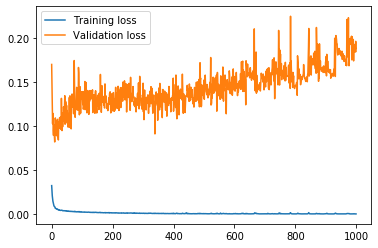

In [72]:
# plot metrics
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='Training loss')
pyplot.plot(history.history['val_loss'], label='Validation loss')

# pyplot.plot(history.history['mean_absolute_percentage_error'])
plt.legend()
pyplot.show()

In [73]:
print(history.history.keys())
print(np.argmin(np.array(history.history['val_loss']))+1)

yhat = model.predict(X_test, verbose=1)
yp = y_scaler.inverse_transform(yhat)
ya = y_scaler.inverse_transform(y_test)

dict_keys(['val_loss', 'loss'])
11
429/429 [==============================] - 0s 125us/step


In [74]:
yp

array([[137.11967, 136.82777],
       [137.04646, 136.8898 ],
       [137.08621, 136.87053],
       [146.834  , 147.30194],
       [151.3965 , 154.58522],
       [136.56416, 138.02402],
       [136.94997, 136.87785],
       [137.26079, 138.2727 ],
       [145.50319, 149.33017],
       [143.39433, 146.85472],
       [139.80106, 145.70451],
       [149.32594, 154.31012],
       [151.11374, 155.38264],
       [147.58815, 150.74994],
       [142.19994, 142.82912],
       [136.86713, 136.76085],
       [138.12682, 138.54456],
       [135.96675, 142.16504],
       [136.06955, 140.4947 ],
       [136.69296, 137.31842],
       [136.93939, 136.87907],
       [136.87059, 136.95778],
       [136.78217, 139.94382],
       [139.79007, 141.20644],
       [136.77507, 137.2531 ],
       [137.00737, 136.90605],
       [136.62695, 139.56137],
       [136.6208 , 138.5673 ],
       [136.65826, 137.27592],
       [136.70825, 137.09456],
       [136.55214, 137.44188],
       [137.06757, 140.06729],
       [

In [75]:
print(yp.shape)
print(ya.shape)

(429, 2)
(429, 2)


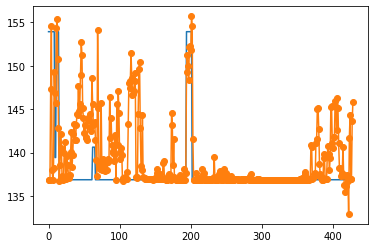

In [76]:
# T1
plt.plot(ya[:,-1:])
plt.plot(yp[:,-1:],marker='o')

# T2
# plt.plot(ya[:,-1:])
# plt.plot(yp[:,-1:],marker='o')

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(yp, ya))
rms_total = (rms*100)/155
rms_total

2.427950807887072

In [46]:
actual = pd.DataFrame(ya[:,-1:])
pred = pd.DataFrame(yp[:,-1:])
print(actual.shape, pred.shape)
com = pd.concat([actual, pred], axis=1, join='inner')
com.columns = ['Act_T2','Pred_T2']
print(com.shape) 
com.to_csv('model1_T2.csv')

(405, 1) (405, 1)
(405, 2)


In [47]:
actual = pd.DataFrame(ya[:,:1])
pred = pd.DataFrame(yp[:,:1])
print(actual.shape, pred.shape)
com = pd.concat([actual, pred], axis=1, join='inner')
com.columns = ['Act_T1','Pred_T1']
print(com.shape)
com.to_csv('model1_T1.csv')

(405, 1) (405, 1)
(405, 2)
